# RELATION OF THE XCT COMPUTED TOMOGRAPHY WITH THE ULTRASOUND PULSE ECHO
# **Effect of the window size in the relation**
### Part 2/X 

### **GOAL**
* Measure the changes originated by the change of the sliding window size.
    * Measure lineal model with window = 1mm^2
    * Measure lineal model with window = 3x3mm^2
    * Measure lineal model with window = 5x5mm^2
    * Measure lineal model with window = 7x7mm^2
    * Measure lineal model with window = 9x9mm^2
    * Compare all models  

## **MATERIALS AND DATA**
There are two origins: data from the reconstructed XCT volume and the attenuation C-scan of the ultrasound volume.
* Ultrasounds data: The attenuation C-scan measured in pulse-eco.  
XCT Scan
* XCT porosity projections with size equal to the C-scans.

## LIBRARIES 

In [2]:
# Mathematical
import scipy
import skimage
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.metrics
import sklearn.linear_model

# Operational
# import importlib
from pathlib import Path
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import napari
from napari.utils import nbscreenshot
%gui qt5

## **ANALYSIS**

## **1. Measure the changes originated by the sliding window**

### Loading dataframes

In [3]:
path_to_dfs_c4567 = Path(r"D:\OneDrive - Universidad Politécnica de Madrid\2_Tareas\20201210_Models_c24567\filter_dataframes")

df_c4_w1 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon4_w1.csv')
df_c5_w1 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon5_w1.csv')
df_c6_w1 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon6_w1.csv')
df_c7_w1 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon7_w1.csv')

df_c4_w3 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon4_w3.csv')
df_c5_w3 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon5_w3.csv')
df_c6_w3 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon6_w3.csv')
df_c7_w3 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon7_w3.csv')

df_c4_w5 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon4_w5.csv')
df_c5_w5 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon5_w5.csv')
df_c6_w5 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon6_w5.csv')
df_c7_w5 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon7_w5.csv')

df_c4_w7 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon4_w7.csv')
df_c5_w7 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon5_w7.csv')
df_c6_w7 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon6_w7.csv')
df_c7_w7 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon7_w7.csv')

df_c4_w9 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon4_w9.csv')
df_c5_w9 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon5_w9.csv')
df_c6_w9 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon6_w9.csv')
df_c7_w9 =  pd.read_csv(path_to_dfs_c4567 / 'df_fil13coupon7_w9.csv')

### Displaying images

In [4]:
## Visualization tool
# The first image of each coupon is the 
viewer = napari.Viewer()

# Images
c4_shape = (154,37)
l_df_cx = [df_c4_w1,
           df_c4_w3,
           df_c4_w5,
           df_c4_w7,
           df_c4_w9]

for i,df in enumerate(l_df_cx):
    att_cscan = df['att_12_prof'].to_numpy().reshape(c4_shape)
    porosity_xct = df['porosity'].to_numpy().reshape(c4_shape)
    viewer.add_image(att_cscan)
    viewer.add_image(porosity_xct).translate = (0,i*45+45)

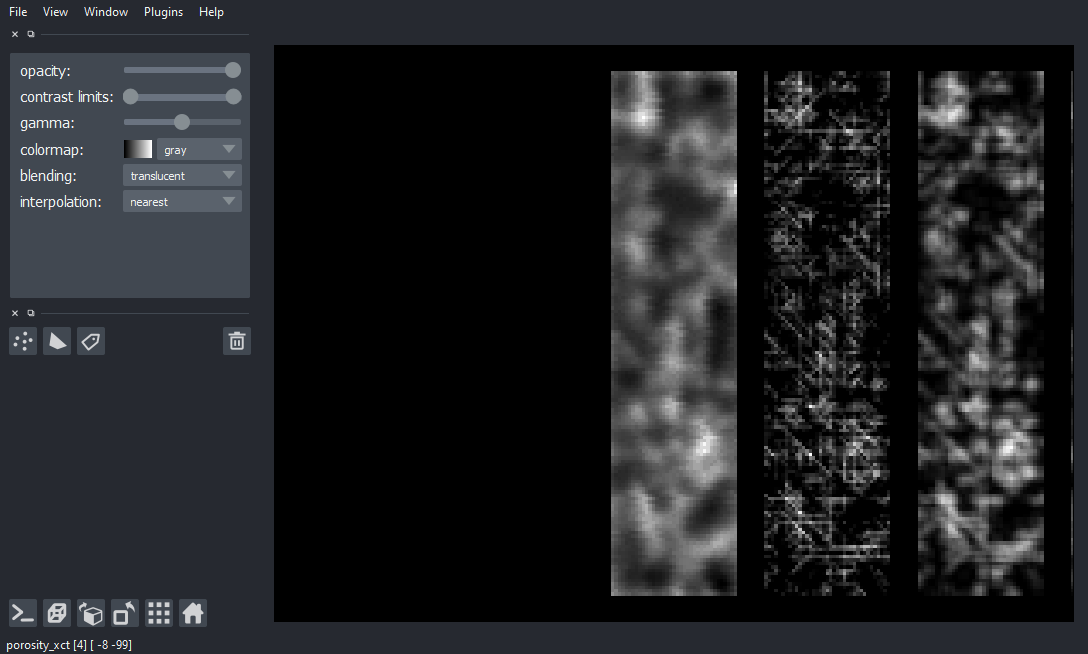

In [5]:
nbscreenshot(viewer)

<div style="background-color: LightYellow; border-color: Orange; padding: 0.5em;">
    From left to right:
    <ol>
        <li> Attenuation C-scan. 
        <li> XCT Porosity projection with size equal to attenuation C-scan 1pixel = 1mm2
        <li> XCT porosity computed with window: 1 pixel = 3x3mm2
        <li> XCT porosity computed with window: 1 pixel = 5x5mm2
        <li> XCT porosity computed with window: 1 pixel = 7x5mm2
        <li> XCT porosity computed with window: 1 pixel = 9x9mm2
            <ol>
    </ol>
    </div>

In [4]:
## Assign same attribute name for df_w1's
l_df_w1 = [df_c4_w1,df_c5_w1,df_c6_w1,df_c7_w1]

for df in l_df_w1:
    df['att_12'] = df['att_12_prof']

In [5]:
df_c4_w1['mod_porosity'] = df_c4_w1['porosity'] * 0.94
df_c4_w3['mod_porosity'] = df_c4_w3['porosity'] * 0.94
df_c4_w5['mod_porosity'] = df_c4_w3['porosity'] * 0.94
df_c4_w7['mod_porosity'] = df_c4_w3['porosity'] * 0.94
df_c4_w9['mod_porosity'] = df_c4_w3['porosity'] * 0.94

In [6]:
df_c4_w1.iloc[100:120,:]

,att_12_prof,porosity,att_12,mod_porosity
100,11.015062,0.000000,11.015062,0.000000
101,10.545602,0.000000,10.545602,0.000000
102,9.963475,0.000000,9.963475,0.000000
103,10.269928,0.000000,10.269928,0.000000
104,11.331438,0.000000,11.331438,0.000000
105,12.037726,0.000000,12.037726,0.000000
106,12.203110,0.000000,12.203110,0.000000
107,13.488108,0.000000,13.488108,0.000000
108,14.535343,0.158120,14.535343,0.148632
109,16.027148,0.235556,16.027148,0.221422


## **1.1 Measure lineal correlation with window sizes = [1,3,5,7,9] mm2**

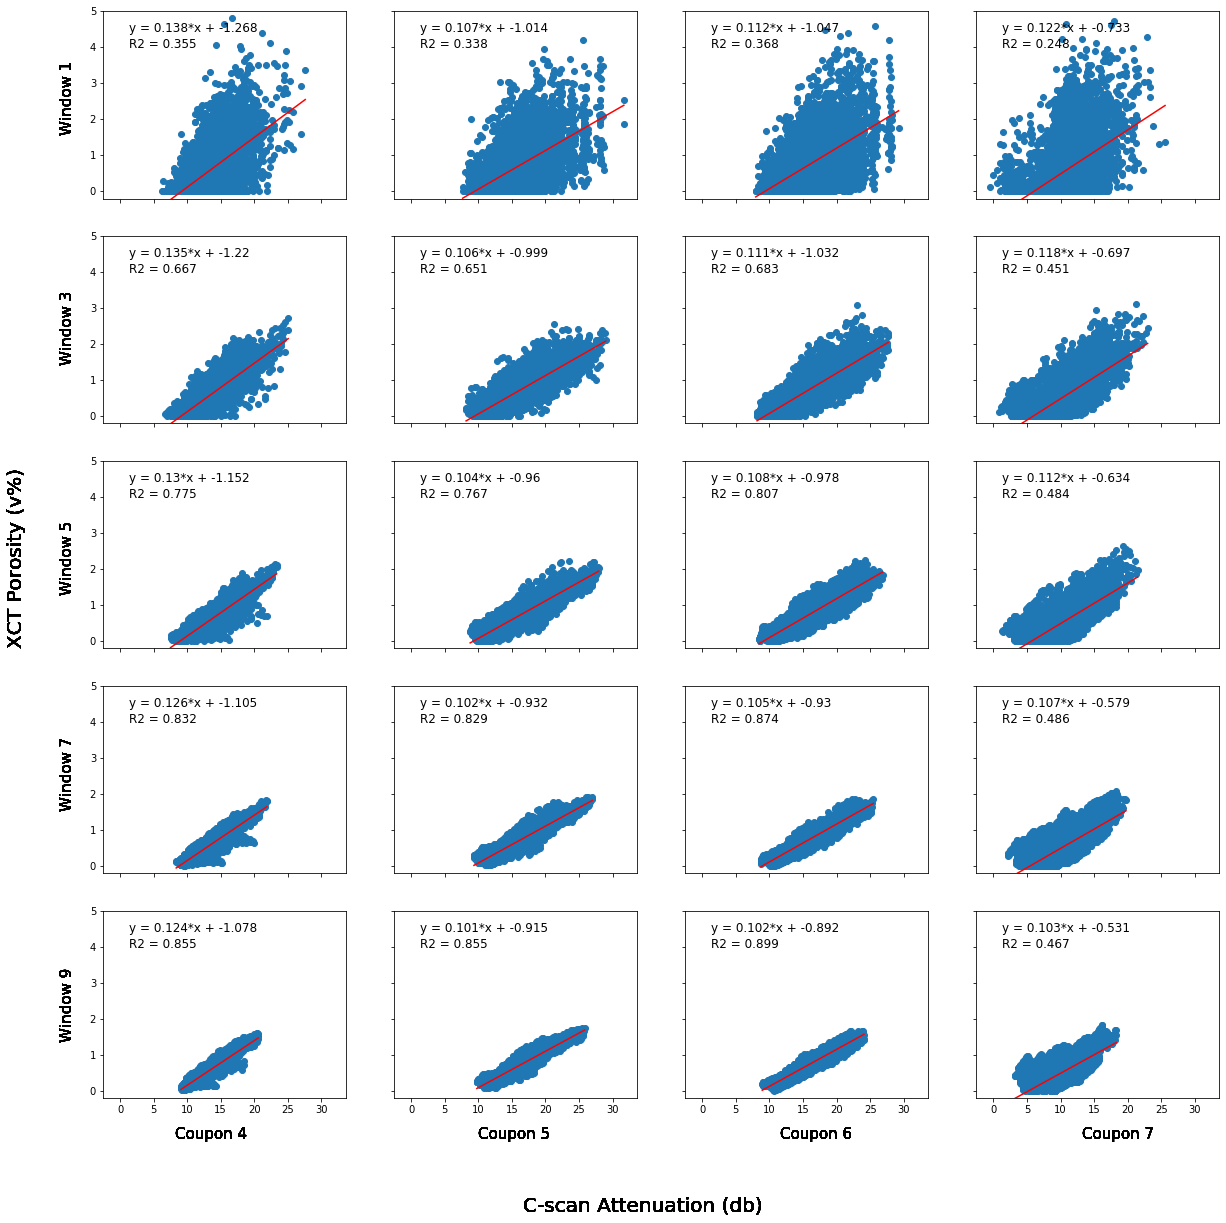

In [20]:
## Window dataframe
l_df_c4 = [df_c4_w1,df_c4_w3,df_c4_w5,df_c4_w7,df_c4_w9]
l_df_c5 = [df_c5_w1,df_c5_w3,df_c5_w5,df_c5_w7,df_c5_w9]
l_df_c6 = [df_c6_w1,df_c6_w3,df_c6_w5,df_c6_w7,df_c6_w9]
l_df_c7 = [df_c7_w1,df_c7_w3,df_c7_w5,df_c7_w7,df_c7_w9]

l_all = [l_df_c4,l_df_c5,l_df_c6,l_df_c7]

fig, ax = plt.subplots(5,4,figsize=(20,20),sharey=True,sharex=True)
init1=1.3
init2=4.5
spacing=0.075
l_R2 = []

for i,row in enumerate(l_all):
    for j,element  in enumerate(row):
        df_train = element
        X_train = df_train['att_12'].to_numpy().reshape(-1,1)
        y_train = df_train['porosity']

        # lineal Regression
        linr1 = skl.linear_model.LinearRegression(fit_intercept=True)
        linr1.fit(X_train,y_train)

        # Plotting regression line
        line_por = np.linspace(np.min(X_train),np.max(X_train),2)    # Porosity
        ylinepor = linr1.predict(line_por.reshape(-1,1))
        l_R2.append(linr1.score(X_train,y_train))

        ax[j,i].scatter(X_train,y_train)

        ax[j,i].plot(line_por,ylinepor,'red')
        ax[j,i].set_ylim( ymin=-0.2, ymax=5)
#         ax[j,i].set_xlim( xmin=0, xmax=30)


        ## Texts
        # Params
        ax[j,i].text(init1, init2-spacing,'y = {}*x + {}'.format(np.round(linr1.coef_[0], decimals=3),np.round(linr1.intercept_, decimals=3))).set_fontsize(12)
        ax[j,i].text(init1, init2-7*spacing,'R2 = {}'.format(np.round(linr1.score(X_train,y_train), decimals=3))).set_fontsize(12)

        # Axis titles
        fig.text(0.5, 0.050, 'C-scan Attenuation (db)', ha='center', va='center').set_fontsize(20)
        fig.text(0.065, 0.5, 'XCT Porosity (v%)', ha='center', va='center', rotation='vertical').set_fontsize(20)
        
        fig.text(0.10, 0.82, 'Window 1', ha='center', va='center', rotation='vertical').set_fontsize(15)
        fig.text(0.10, 0.66, 'Window 3', ha='center', va='center', rotation='vertical').set_fontsize(15)
        fig.text(0.10, 0.50, 'Window 5', ha='center', va='center', rotation='vertical').set_fontsize(15)
        fig.text(0.10, 0.35, 'Window 7', ha='center', va='center', rotation='vertical').set_fontsize(15)
        fig.text(0.10, 0.19, 'Window 9', ha='center', va='center', rotation='vertical').set_fontsize(15)

        fig.text(0.20, 0.10, 'Coupon 4', ha='center', va='center').set_fontsize(15)
        fig.text(0.41, 0.10, 'Coupon 5', ha='center', va='center').set_fontsize(15)
        fig.text(0.62, 0.10, 'Coupon 6', ha='center', va='center').set_fontsize(15)
        fig.text(0.83, 0.10, 'Coupon 7', ha='center', va='center').set_fontsize(15)

### R2 Versus size of the window

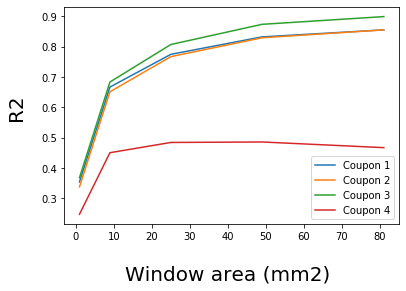

In [54]:
a_R2 = np.array(l_R2).reshape(4,5)
window_a = np.array([1,3,5,7,9])**2

for row in a_R2:
    plt.plot(window_a,row)
    
## Texts
# plt.xlabel('Window area (mm2)',fontsize=12)
# plt.ylabel('R2',fontsize=12)
plt.text(40, 0.050, 'Window area (mm2)', ha='center', va='center').set_fontsize(20)
plt.text(-15.50, 0.6, 'R2', ha='center', va='center', rotation='vertical').set_fontsize(20)

plt.legend(['Coupon 1',
            'Coupon 2',
            'Coupon 3',
            'Coupon 4'])

### All regression lines for each coupon in a graphic

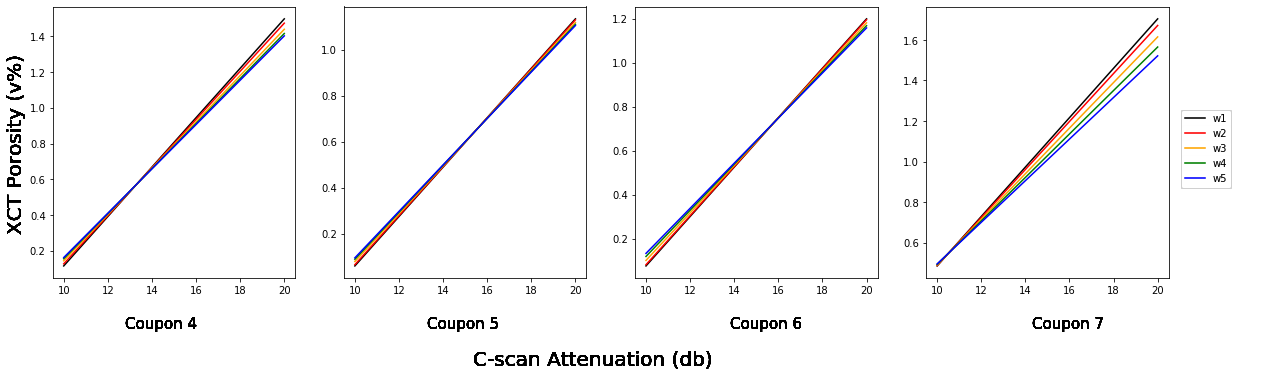

In [10]:
## Window dataframe
l_df_c4 = [df_c4_w1,df_c4_w3,df_c4_w5,df_c4_w7,df_c4_w9]
l_df_c5 = [df_c5_w1,df_c5_w3,df_c5_w5,df_c5_w7,df_c5_w9]
l_df_c6 = [df_c6_w1,df_c6_w3,df_c6_w5,df_c6_w7,df_c6_w9]
l_df_c7 = [df_c7_w1,df_c7_w3,df_c7_w5,df_c7_w7,df_c7_w9]

l_all = [l_df_c4,l_df_c5,l_df_c6,l_df_c7]

fig, ax = plt.subplots(1,4,figsize=(20,5))
init1=1.3
init2=4.5
spacing=0.075

for i,row in enumerate(l_all):
    for j,element  in enumerate(row):
        df_train = element
        X_train = df_train['att_12'].to_numpy().reshape(-1,1)
        y_train = df_train['porosity']

        # lineal Regression
        linr1 = skl.linear_model.LinearRegression(fit_intercept=True)
        linr1.fit(X_train,y_train)

        # Plotting regression line
        line_por = np.array([10,20])    # Porosidad
        ylinepor = linr1.predict(line_por.reshape(-1,1))

#         ax[i].scatter(X_train,y_train)
        l_color = ['black','red','orange','green','blue']
        ax[i].plot(line_por,ylinepor,l_color[j])
#         ax[i].set_ylim( ymin=-0.2, ymax=2)
#         ax[i].set_xlim( xmin=10, xmax=20)

        fig.legend(['w1','w2','w3','w4','w5'],loc=(0.93,0.5))


        ## Texts
        # Params
#         ax[i].text(init1, init2-spacing,'y = {}*x + {}'.format(np.round(linr1.coef_[0], decimals=3),np.round(linr1.intercept_, decimals=3)))
#         ax[i].text(init1, init2-4*spacing,'R2 = {}'.format(np.round(linr1.score(X_train,y_train), decimals=3)))

        # Axis titles
        fig.text(0.5, -0.10, 'C-scan Attenuation (db)', ha='center', va='center').set_fontsize(20)
        fig.text(0.10, 0.5, 'XCT Porosity (v%)', ha='center', va='center', rotation='vertical').set_fontsize(20)

        fig.text(0.20, 0.00, 'Coupon 4', ha='center', va='center').set_fontsize(15)
        fig.text(0.41, 0.00, 'Coupon 5', ha='center', va='center').set_fontsize(15)
        fig.text(0.62, 0.00, 'Coupon 6', ha='center', va='center').set_fontsize(15)
        fig.text(0.83, 0.00, 'Coupon 7', ha='center', va='center').set_fontsize(15)

<div style="background-color: LightYellow; border-color: LightYellow; border-left: 5px solid Orange; padding: 0.5em;">    <strong>RESULTS:</strong> 
</div>

<div style="background-color: LightYellow; border-color: Orange; border-left: 5px solid Orange; padding: 0.5em;">
    <ul>
        <li> <strong>R2:</strong> The R2 increases with the size of the window from below 0.4 for the window=1mm2 to above 0.85 for windows=81mm2. Except for the coupon 7.  
        <li> <strong>Coefficients</strong> The trend is that the slope of the regression line decreases with the size of the window.
        <li> <strong>Coupon 7 is different</strong> The scatter data and lineal regression show how coupon still 7 presents different behaviour than the rest of coupons. Furthermore, it is the only one that does not fit better for window sizes greater than 3x3 mm.
        <li> <strong>Distribution</strong> The data tend to become more homogenous as the window size increases. The void fraction uppest limit decreases from 5 in the window size equal to 1mm2 to a value around 1.7% for the window of size 9x9mm2
        <ul>
    </ul>
    </div>

### Cell to check individually each coupon

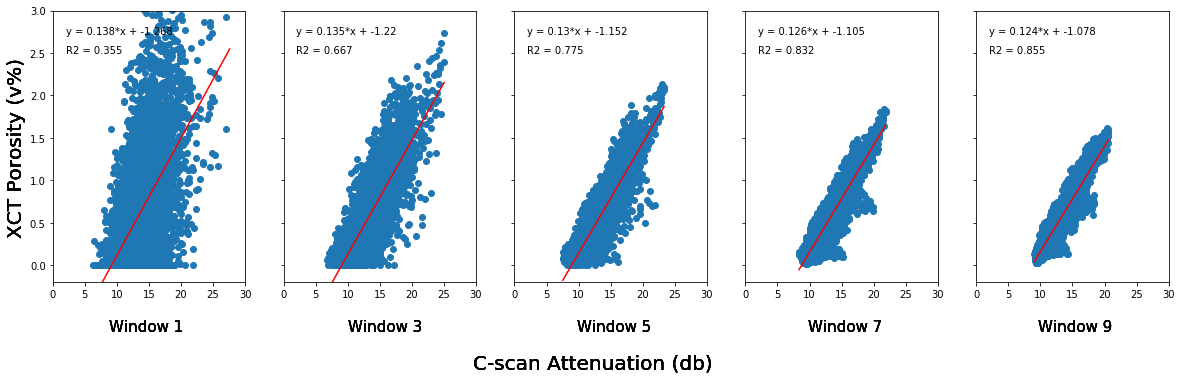

In [11]:
## Window dataframe
l_dfs_c4 = [df_c4_w1,df_c4_w3,df_c4_w5,df_c4_w7,df_c4_w9]


fig, ax = plt.subplots(1,5,figsize=(20,5),sharey=True,sharex=True)
init1=2
init2=2.8
spacing=0.075

for i,df in enumerate(l_dfs_c4):
    df_train = df
    X_train = df_train['att_12'].to_numpy().reshape(-1,1)
    y_train = df_train['porosity']

    # lineal Regression
    linr1 = skl.linear_model.LinearRegression(fit_intercept=True)
    linr1.fit(X_train,y_train)

    # Plotting regression line
    line_por = np.linspace(np.min(X_train),np.max(X_train),2)    # Porosidad
    ylinepor = linr1.predict(line_por.reshape(-1,1))

    ax[i].scatter(X_train,y_train)
    
    ax[i].plot(line_por,ylinepor,'red')
    ax[i].set_ylim( ymin=-0.2, ymax=3)
    ax[i].set_xlim( xmin=0, xmax=30)
    
    
    ## Texts
    # Params
    ax[i].text(init1, init2-spacing,'y = {}*x + {}'.format(np.round(linr1.coef_[0], decimals=3),np.round(linr1.intercept_, decimals=3)))
    ax[i].text(init1, init2-4*spacing,'R2 = {}'.format(np.round(linr1.score(X_train,y_train), decimals=3)))
    
    # Axis titles
    fig.text(0.5, -0.10, 'C-scan Attenuation (db)', ha='center', va='center').set_fontsize(20)
    fig.text(0.10, 0.5, 'XCT Porosity (v%)', ha='center', va='center', rotation='vertical').set_fontsize(20)
    
    fig.text(0.19, 0.00, 'Window 1', ha='center', va='center').set_fontsize(15)
    fig.text(0.3555, 0.00, 'Window 3', ha='center', va='center').set_fontsize(15)
    fig.text(0.515, 0.00, 'Window 5', ha='center', va='center').set_fontsize(15)
    fig.text(0.675, 0.00, 'Window 7', ha='center', va='center').set_fontsize(15)
    fig.text(0.835, 0.00, 'Window 9', ha='center', va='center').set_fontsize(15)

-----------------------------------------------

<div style="background-color: #EDF7FF; border-color: #EDF7FF; border-left: 5px solid #7C9DBF; padding: 0.5em;">    <strong>CONCLUSIONS:</strong> Effect of the window in the relationship between XCT and UT 
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
* The window size is a vital factor in the lineal relationship between attenuation and void fraction, it affects the distribution of the data.   

* The increase in R2 is not lineal, its growth occurs mostly from the window of 1mm to the 3mm.
    
* The ultrasound ray is impacting approximately a circular area of radious =1.8 (10.2mm2). Probably the best balance between size and void fraction resolution are the models between window size 3x3mm and 5x5mm.    
    </div>